In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# Load the dataset
file_path = "indian_retailsales_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


                               Order ID  Order Date         Region  \
0  63c3bfc2-752f-4c3f-878b-68724ae30039  2024-03-06     East India   
1  f12f47d4-95de-46d4-b3e8-71ab84f6aa01  2024-07-09  Central India   
2  79d3d628-5319-4b9b-82ef-9e06618b4972  2023-07-10     East India   
3  673031df-187d-400b-afe7-b7c8c34231c6  2024-04-29    North India   
4  9e9a4b70-46d4-48b1-9d89-153d7e0df118  2023-10-01     East India   

          City Product Category Customer Segment     Sales    Profit  \
0       Nagpur          Apparel       Individual  30814.49   6438.96   
1  Bhubaneswar            Books        Corporate  19510.79  13269.99   
2        Patna      Electronics        Corporate  32259.42    943.33   
3       Bhopal          Apparel       Individual  30621.25       NaN   
4      Chennai      Electronics       Individual  31275.92  19237.84   

   Quantity  Discount  
0        31      0.27  
1        22      0.28  
2        24      0.18  
3        28       NaN  
4        26      0.11  


In [25]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values if any
data.fillna(0, inplace=True)

# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Drop duplicates
data.drop_duplicates(inplace=True)

# Check data types
print(data.dtypes)


Order ID              0
Order Date            0
Region                0
City                  0
Product Category      0
Customer Segment      0
Sales                 0
Profit              107
Quantity              0
Discount            107
dtype: int64
Order ID                    object
Order Date          datetime64[ns]
Region                      object
City                        object
Product Category            object
Customer Segment            object
Sales                      float64
Profit                     float64
Quantity                     int64
Discount                   float64
dtype: object


          Region       Sales
0  Central India  4877507.67
1     East India  4842548.83
2    North India  4514894.26
3    South India  5001161.31
4     West India  5537022.55


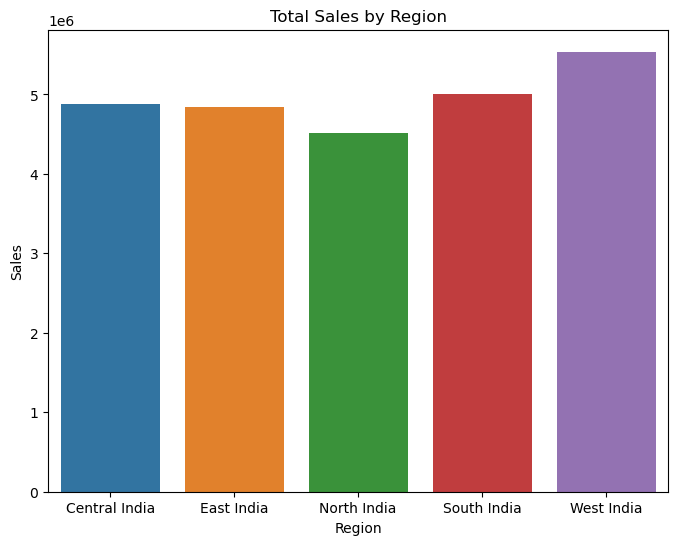

In [27]:
region_sales = data.groupby('Region')['Sales'].sum().reset_index()
print(region_sales)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Sales', data=region_sales)
plt.title('Total Sales by Region')
plt.show()


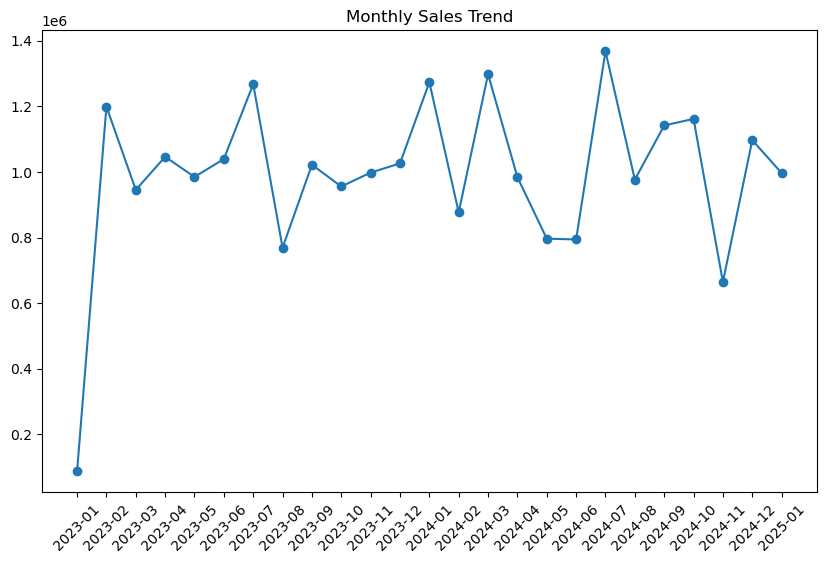

In [29]:
data['Month'] = data['Order Date'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.show()


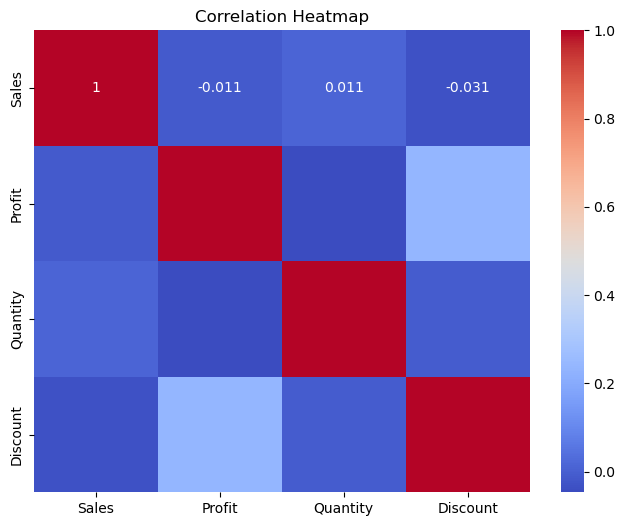

In [31]:
# Select numerical columns
corr_data = data[['Sales', 'Profit', 'Quantity', 'Discount']]
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Explained Variance Ratio: [0.31202175 0.25023985]


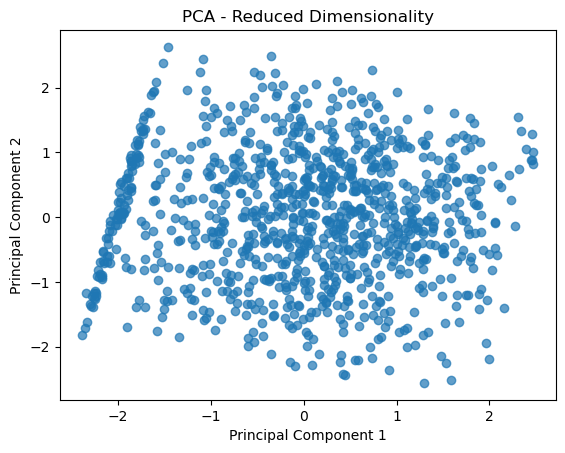

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_data = data[['Sales', 'Profit', 'Quantity', 'Discount']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Visualize the PCA result
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.7)
plt.title('PCA - Reduced Dimensionality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = data[['Sales', 'Quantity', 'Discount']]  # Features
y = data['Profit']  # Target

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 39385354.63671956
R² Score: 0.04277093330080728


C:\Users\nisha\AppData\Local\Temp\ipykernel_13656\3975362936.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [33]:
# Calculate Recency, Frequency, and Monetary value
today = data['Order Date'].max()
rfm = data.groupby('Customer Segment').agg({
    'Order Date': lambda x: (today - x.max()).days,  # Recency
    'Sales': 'sum',                                 # Monetary
    'Customer Segment': 'count'                    # Frequency
}).rename(columns={'Order Date': 'Recency', 'Sales': 'Monetary', 'Customer Segment': 'Frequency'})

print(rfm)


                  Recency    Monetary  Frequency
Customer Segment                                
Corporate               1  8735507.87        343
Individual              0  8570622.52        339
Retail                  1  7467004.23        318


In [35]:
product_sales = data.groupby('Product Category')['Sales'].sum().reset_index()
product_profit = data.groupby('Product Category')['Profit'].sum().reset_index()

# Merge for comparison
product_analysis = pd.merge(product_sales, product_profit, on='Product Category')
print(product_analysis)


  Product Category       Sales      Profit
0          Apparel  4805961.23  1748965.72
1            Books  4867516.51  1636431.83
2      Electronics  5157415.59  1656392.90
3        Groceries  5081358.24  1776292.57
4  Home Appliances  4860883.05  1633280.48


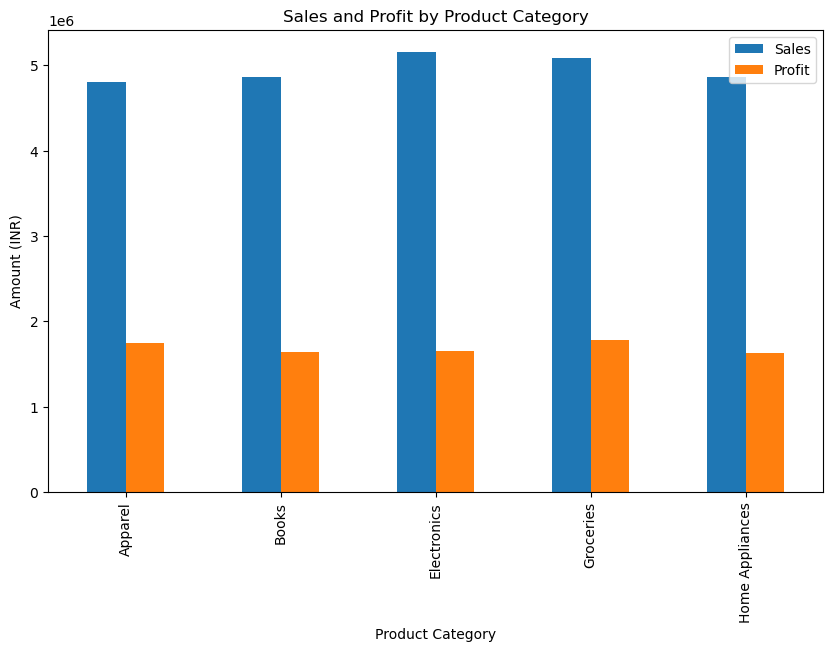

In [47]:
#A grouped bar chart comparing Sales and Profit across categories.
category_analysis = data.groupby('Product Category')[['Sales', 'Profit']].sum().reset_index()
category_analysis.plot(kind='bar', x='Product Category', figsize=(10, 6))
plt.title('Sales and Profit by Product Category')
plt.ylabel('Amount (INR)')
plt.show()


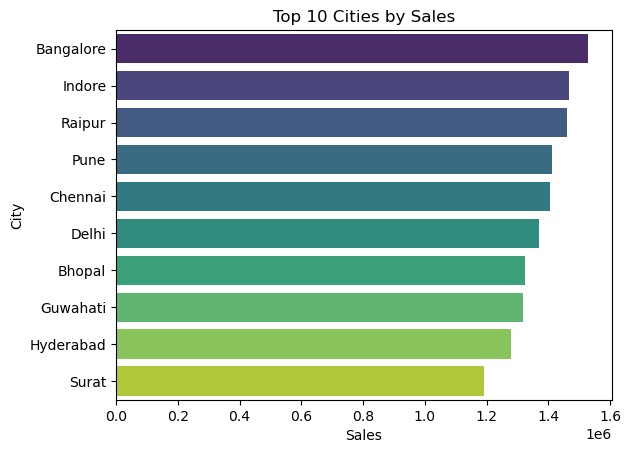

In [49]:

#Top 10 Cities by Total Sales:
top_cities = data.groupby('City')['Sales'].sum().nlargest(10).reset_index()
sns.barplot(x='Sales', y='City', data=top_cities, palette='viridis')
plt.title('Top 10 Cities by Sales')
plt.show()


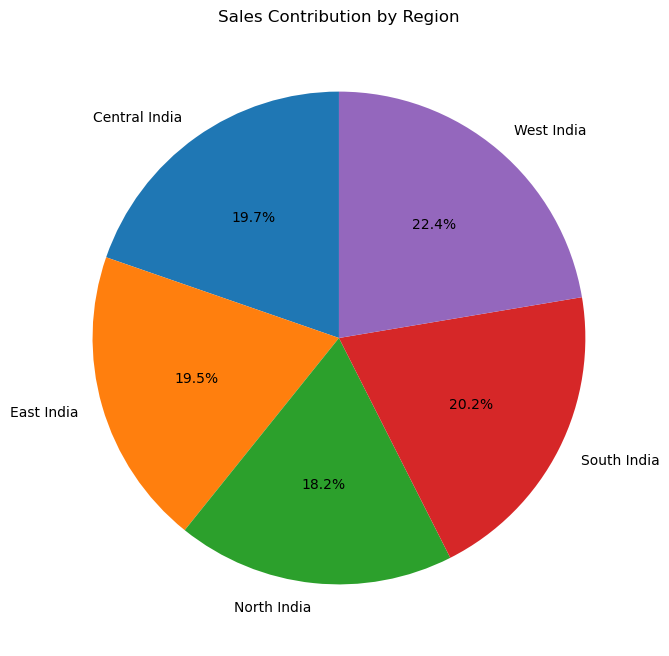

In [51]:
#Sales Contribution by Region:

region_sales = data.groupby('Region')['Sales'].sum()
region_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Sales Contribution by Region')
plt.ylabel('')  # Remove default ylabel
plt.show()
